Découverte de données 


In [ ]:
#Imporatation des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importation des fichiers 

df0  = pd.read_csv('Sales_April_2019.csv')
df1  = pd.read_csv("Sales_August_2019.csv")
df2  = pd.read_csv("Sales_December_2019.csv")
df3  = pd.read_csv("Sales_February_2019.csv")
df4  = pd.read_csv("Sales_January_2019.csv")
df5  = pd.read_csv("Sales_July_2019.csv")
df6  = pd.read_csv("Sales_June_2019.csv")
df7  = pd.read_csv("Sales_March_2019.csv")
df8  = pd.read_csv("Sales_May_2019.csv")
df9  = pd.read_csv("Sales_November_2019.csv")
df10  = pd.read_csv("Sales_October_2019.csv")
df11 = pd.read_csv("Sales_September_2019.csv")


In [ ]:
#Concaténation en un DataFrame
df = pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])

In [ ]:
#Large vue sur le DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
#Description sur les données manquantes 
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
#Supprimer les valeurs manquantes
df = df.dropna(how='all')
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire ?

In [ ]:
#Création d'une fonction qui permet de spliter que le mois 
def month(x):
 return x.split('/')[0]

df['Month'] = df["Order Date"].apply(month)

In [ ]:
#Large vue sur les valeurs de la colonne mois
df['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [ ]:
#Suppréssion de la valeurs other date

df = df[df['Month'] != 'Order Date']
df['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [ ]:
#Conversion de la colonne month en int

df['Month'] = df['Month'].astype(int)
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [ ]:
# Chiffre d'affaire = Quantité *  Prix Unit

#1 Conversion de la colonne Prix Unit et Quantité en Float

df['Price Each'] =df['Price Each'].astype(float) 
df['Quantity Ordered'] =df['Quantity Ordered'].astype(float) 

df.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [ ]:
# Calcul du chiffre d'affaire 

df['Sales'] = df['Price Each'] * df['Price Each']

In [ ]:
#2 Faire un groupby entre le mois et la somme du chiffre d'affaire

df.groupby('Month')['Sales'].sum()

Month
1     1.399765e+09
2     1.671013e+09
3     2.178706e+09
4     2.619025e+09
5     2.537282e+09
6     2.022035e+09
7     2.069488e+09
8     1.736057e+09
9     1.628969e+09
10    2.944105e+09
11    2.492117e+09
12    3.610785e+09
Name: Sales, dtype: float64

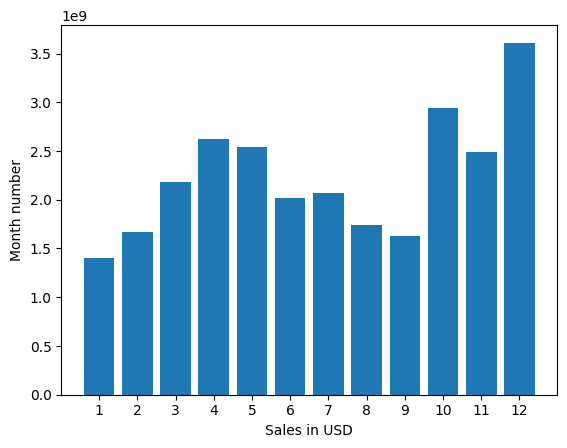

In [ ]:
#3 Visualisation des résultats 

months= range(1,13)
plt.bar(months, df.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.xlabel('Sales in USD')
plt.ylabel('Month number')
plt.show()

#Le meilleur chiffre d'affaire est le Mois 12

# Quelle est la ville qui a réalisée plus de vente ? 

In [ ]:
# Création d'une fonction qui récupere la ville 
def city(x):
  return x.split(',')[1] 

df['City'] = df['Purchase Address'].apply(city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,142.8025,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,9998.0001,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,360000.0000,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,143.7601,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,143.7601,Los Angeles


In [ ]:
# Regrouper les données en fonction des villes

df.groupby('City')['City'].count()

City
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: City, dtype: int64

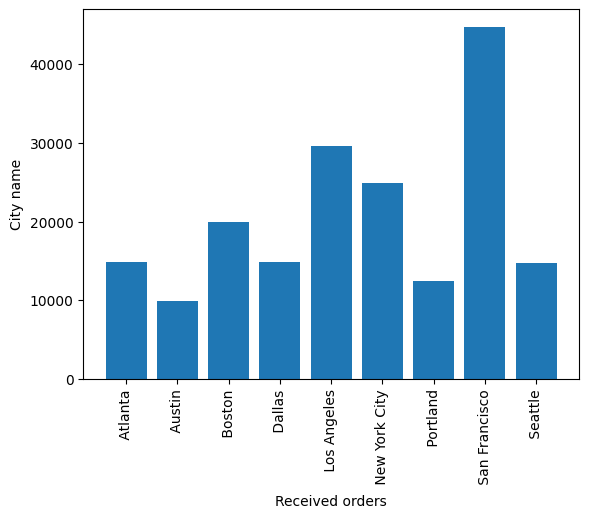

In [ ]:
# Visualisation des résultats 

city_index = df.groupby('City')['City'].count().index


plt.bar(city_index, df.groupby('City')['City'].count())
plt.xticks(rotation='vertical')
plt.xlabel('Received orders')
plt.ylabel('City name')
plt.show()

# La ville avec le maximuim de commande est San Francisco
# La ville avec moin de commande est Austin

A quel moment doit on faire une compagne publicitaire pour avoir plus de ventes ?

In [ ]:
# Transformer la colonne Order Date en donnée tomporaire

df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,142.8025,Dallas,8
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,9998.0001,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,360000.0000,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,143.7601,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,143.7601,Los Angeles,9


In [ ]:
# Trouver le nombre de commande effectués par heure
keys = []
hours = []

for key,hour in df.groupby('Hour'):
  keys.append(key)
  hours.append(len(hour))

Text(0, 0.5, 'Nombre de commandes [Hours]')

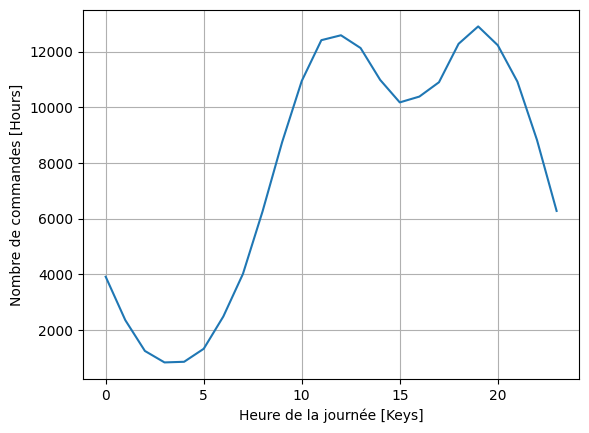

In [ ]:
# Visualisation des résultats 

plt.grid()
plt.plot(keys,hours)
plt.xlabel('Heure de la journée [Keys]')
plt.ylabel('Nombre de commandes [Hours]')

# Le maximuim de commandes est entre 12h et 19h

# Quel est le produit qui réalise le plus de vente ?

<Axes: xlabel='Product'>

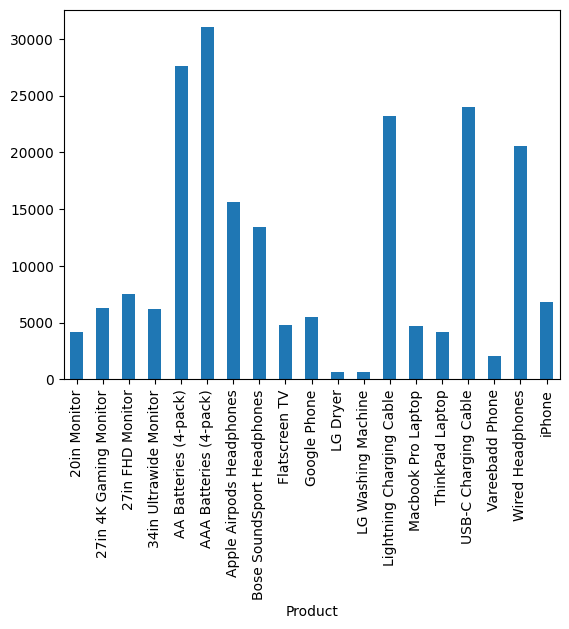

In [ ]:
# Regrouper et visualiser les produits les plus vendus

df.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [ ]:
# Regrouper la moyenne des prix des produits 

df.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [ ]:
# Reorganisation de chaque produit, moyenne et index en variable spécifique
Products = df.groupby('Product')['Quantity Ordered'].sum().index
Quantity = df.groupby('Product')['Quantity Ordered'].sum()
Price = df.groupby('Product')['Price Each'].mean()

<ipython-input-90-e4d8f2d9cdc1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Products,rotation='vertical',size=8)


<Figure size 4000x2400 with 0 Axes>

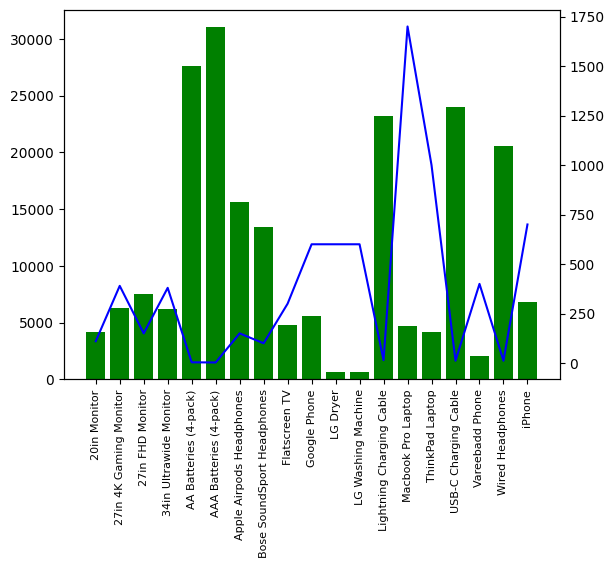

In [90]:
# Visualisation des résultats des produits les plus vendus en fonction de la moyenne des prix 

plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(Products,Quantity, color='g')
ax2.plot(Products,Price, color='b')

ax1.set_xticklabels(Products,rotation='vertical',size=8)
plt.show()

# Le produit qui a réalisé plus de vente est la battrie (4 packs ) avec un prix  pas cher 

Quelles sont les combinaisons qui se vendent le plus ?

In [96]:
# E
df[df['Order Date'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform( lambda x: ','.join(x))

<Axes: ylabel='Grouped'>

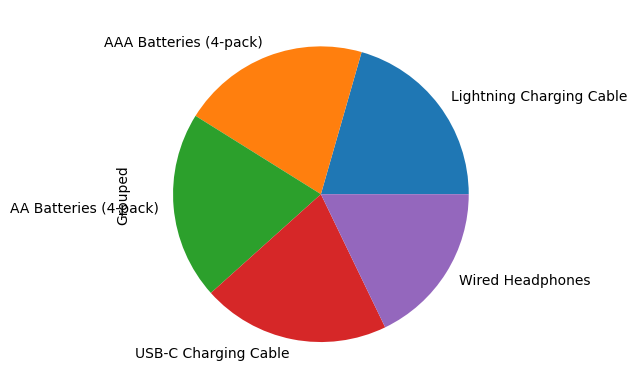

In [104]:
# Supprimer les éléments duppliqués

df2 = df.drop_duplicates(subset=['Order ID'])

# Combinaison les plus achetés
df2['Grouped'].value_counts()[0:5].plot.pie()

# Les combinaisons les plus achetés sont : Lightning Charging Cable & AAA Batteries (4-pack) &  AA Batteries (4-pack)

Lightning Charging Cable    19831
AAA Batteries (4-pack)      19826
AA Batteries (4-pack)       19809
USB-C Charging Cable        19792
Wired Headphones            17208
Name: Grouped, dtype: int64